# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


(60000, 28, 28)


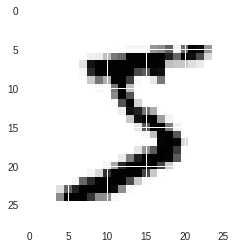

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()

 
#model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
#model.add(Convolution2D(10, 1, activation='relu'))
#model.add(Convolution2D(10, 26))
#model.add(Flatten())
#model.add(Activation('softmax'))


model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(128, 3, 3, activation='relu'))
model.add(Convolution2D(128, 3, 3, activation='relu'))
model.add(Convolution2D(64, 1, activation='relu'))
model.add(Convolution2D(10, 8))

model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  app.launch_new_instance()


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 8, 8, 128)         147584    
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 8, 8, 64)          8256      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 1, 1, 10)          40970     
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1)

Epoch 1/20
60000/60000 [==============================] - 13s 214us/step - loss: 0.1654 - acc: 0.9512
Epoch 2/20
60000/60000 [==============================] - 12s 200us/step - loss: 0.0450 - acc: 0.9866
Epoch 3/20
60000/60000 [==============================] - 12s 200us/step - loss: 0.0304 - acc: 0.9908
Epoch 4/20
60000/60000 [==============================] - 12s 200us/step - loss: 0.0235 - acc: 0.9931
Epoch 5/20
60000/60000 [==============================] - 12s 200us/step - loss: 0.0196 - acc: 0.9935
Epoch 6/20
60000/60000 [==============================] - 12s 199us/step - loss: 0.0162 - acc: 0.9950
Epoch 7/20
60000/60000 [==============================] - 12s 200us/step - loss: 0.0122 - acc: 0.9960
Epoch 8/20
60000/60000 [==============================] - 12s 199us/step - loss: 0.0120 - acc: 0.9963
Epoch 9/20
60000/60000 [==============================] - 12s 200us/step - loss: 0.0100 - acc: 0.9969
Epoch 10/20
60000/60000 [==============================] - 12s 200us/step - loss: 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.04313953253418477, 0.9914]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[5.90359624e-16 8.18584784e-20 1.27947876e-14 2.57111910e-12
  9.87324425e-24 1.24066377e-19 5.38156947e-29 1.00000000e+00
  6.20290871e-18 5.74638514e-12]
 [4.09260595e-18 1.49021567e-17 1.00000000e+00 2.78428419e-22
  1.20068934e-22 2.07074521e-31 7.23787875e-15 3.39857340e-27
  1.77319482e-18 3.91972581e-27]
 [2.97946008e-14 1.00000000e+00 7.48701275e-12 1.19442769e-12
  6.89352520e-10 9.14007536e-09 2.05394625e-11 4.32764189e-08
  9.41884681e-10 5.40327162e-14]
 [1.00000000e+00 3.42117640e-22 2.87106688e-15 2.91164939e-19
  1.06136204e-19 2.50790963e-21 1.88908504e-16 2.83626887e-20
  3.29466218e-13 4.51587688e-14]
 [1.02150432e-11 1.34647035e-12 4.91986768e-13 1.12464791e-14
  9.99999762e-01 1.59632560e-15 5.55532981e-11 3.33080917e-17
  1.81281106e-08 2.46704673e-07]
 [7.73052613e-16 1.00000000e+00 6.93372859e-11 4.27471032e-16
  6.05504868e-10 2.03721398e-13 2.21439586e-14 2.35009043e-08
  8.27367428e-12 2.58513100e-14]
 [6.02057780e-26 6.57757702e-12 3.19726317e-17 1.17757480e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

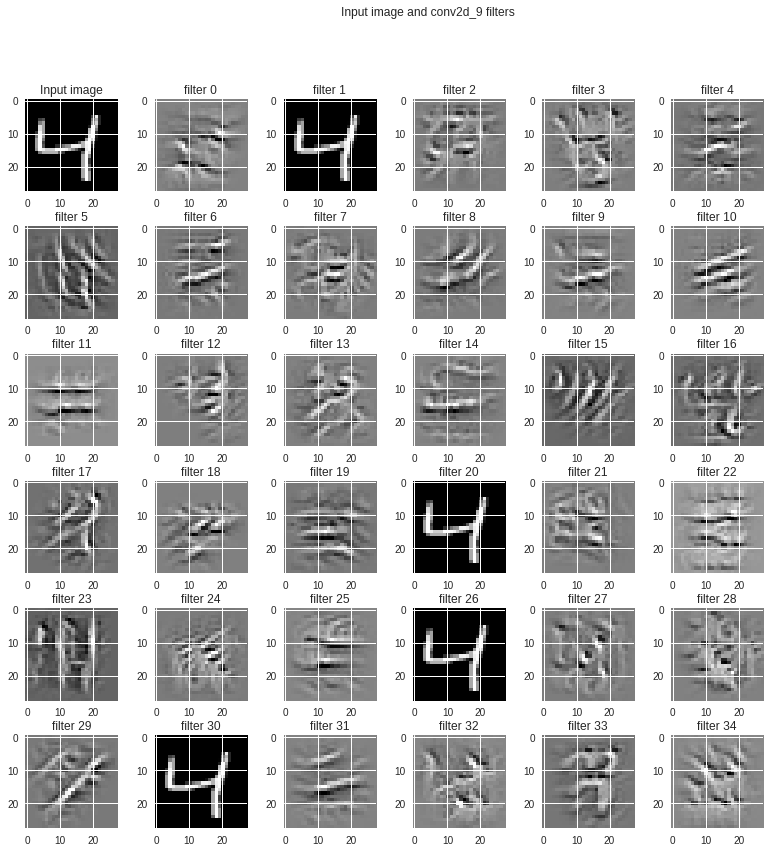

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_9'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()